# MNIST by TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import layers, models

In [4]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
# ピクセル値を0から1の範囲にスケーリング
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
# モデルの構築
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # 28x28の画像を1次元に変換
    layers.Dense(128, activation='relu'), # 128個のノードを持つ全結合層
    layers.Dropout(0.2), # ドロップアウト層。過学習を防ぐためにランダムにノードを無効化する
    layers.Dense(10, activation='softmax') # 10個のノードを持つ全結合層。各ノードは0-9の数字のいずれかを表す
])

In [8]:
# モデルのコンパイル
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
# モデルの学習を実行
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 619us/step - loss: 0.0639 - accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 1s 577us/step - loss: 0.0575 - accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 1s 560us/step - loss: 0.0520 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 1s 548us/step - loss: 0.0458 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 1s 562us/step - loss: 0.0429 - accuracy: 0.9854


In [10]:
# テストデータセットで、モデルの性能を評価
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 395us/step - loss: 0.0728 - accuracy: 0.9766
Test accuracy: 0.9765999913215637


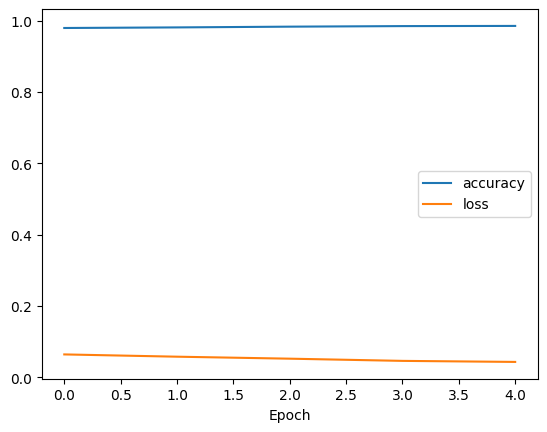

In [14]:
# 学習曲線のプロット
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
# 混同行列のプロット
from sklearn.metrics import confusion_matrix
import seaborn as sns



313/313 [==============================] - 0s 348us/step


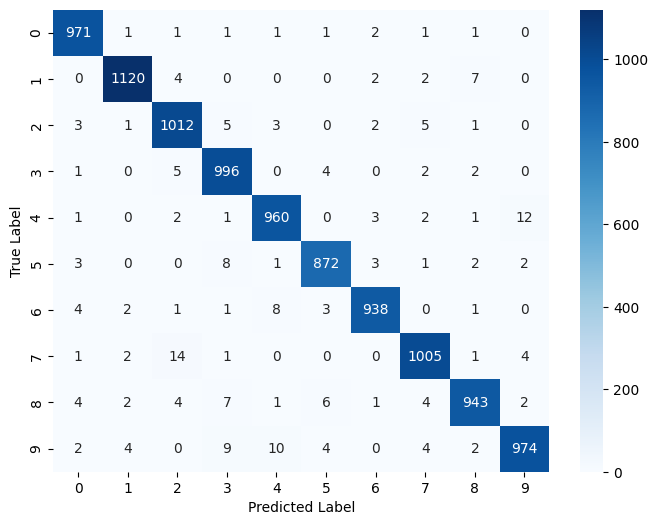

In [18]:
# モデルの評価
predictions = model.predict(test_images)
conf_matrix = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

# 混同行列のプロット
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1/1 [==============================] - 0s 10ms/step


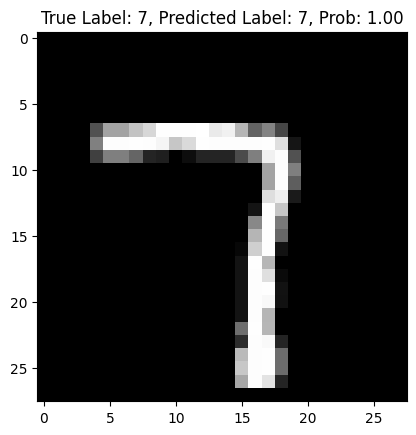

1/1 [==============================] - 0s 12ms/step


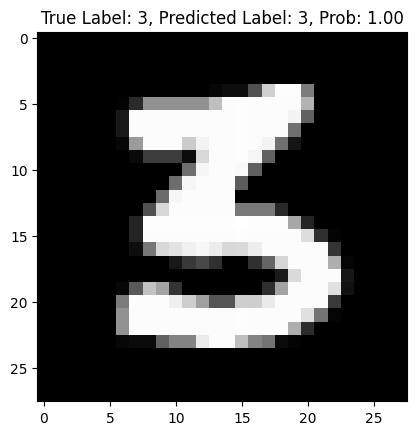

1/1 [==============================] - 0s 9ms/step


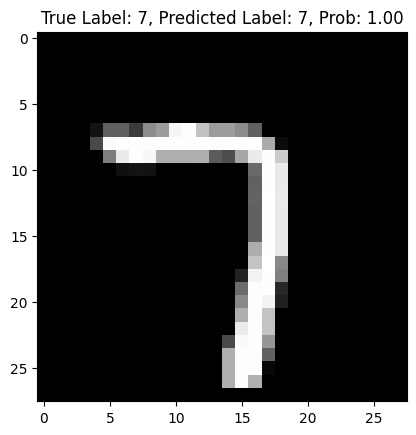

In [20]:
# 予測結果の表示

# テストデータからランダムにサンプルを取り出す
num_samples = 3
random_indices = np.random.choice(len(test_images), num_samples, replace=False)

# 予測と正解ラベルの表示
for index in random_indices:
    input_image = test_images[index]
    true_label = test_labels[index]
    predicted_probs = model.predict(np.expand_dims(input_image, axis=0))
    predicted_label = np.argmax(predicted_probs)

    plt.figure()
    plt.imshow(input_image, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}, Prob: {predicted_probs[0][predicted_label]:.2f}')
    plt.show()